In [47]:
def euler(f, x0, y0, h, n):
    """
    Metoda Eulera do rozwiązywania równań różniczkowych
    f  - funkcja f(t, y) definiująca ODE: dy/dt = f(t, y)
    x0 - początkowy czas
    y0 - wartość początkowa y(t0)
    h  - krok czasowy
    n  - liczba kroków
    """

    #DEFINICJA ZMIENNYCH POMOCNICZYCH
    #------------------------------------------
    x, y = x0, y0
    results = [(x, y)]
    #------------------------------------------

    #WZOREK Z WYKŁADU
    #------------------------------------------
    for _ in range(n):
        y = y + h * f(x, y)
        x = x + h
        results.append((x, y))
    #------------------------------------------

    #ZWRACAM
    #------------------------------------------
    return results
    #------------------------------------------
def heun(f, x0, y0, h, n):
    """
    Metoda Heuna do rozwiązywania ODE: dy/dt = f(t, y)
    f  - funkcja f(t, y)
    t0 - czas początkowy
    y0 - wartość początkowa
    h  - krok czasowy
    n  - liczba kroków
    """

    #ZMIENNE POMOCNICZE
    #------------------------------------------
    x, y = x0, y0
    results = [(x, y)]
    #------------------------------------------

    #FUNKCJA Z WYKŁADU
    #------------------------------------------
    for _ in range(n):
        y = y + h * f(x + h/2, y + (h/2) * f(x,y))
        x = x + h
        results.append((x, y))
    #------------------------------------------

    #ZWRACAM
    #------------------------------------------
    return results
    #------------------------------------------
def runge_kutta(f, X0, y0, h, n):

    """
    Metoda Rungego-Kutty 4. rzędu do rozwiązywania ODE: dy/dt = f(t, y)
    f  - funkcja f(t, y)
    t0 - czas początkowy
    y0 - wartość początkowa
    h  - krok czasowy
    n  - liczba kroków
    """
    #ZMIENNE POMOCNICZE
    #------------------------------------------
    x, y = X0, y0
    results = [(x, y)]
    #------------------------------------------



    #WZOREK Z WYKŁADU
    #------------------------------------------
    for _ in range(n):
        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)
        k3 = f(x + h/2, y + h/2 * k2)
        k4 = f(x + h, y + h * k3)
        y = y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
        x = x + h
        results.append((x, y))
    #------------------------------------------

    #ZWRACAM
    #------------------------------------------
    return results
    #------------------------------------------
    

In [48]:


from scipy.integrate import solve_ivp

def get_exact_solution(f, t0, y0, t_end, num_points=1000):
    """
    Oblicza rozwiązanie referencyjne ODE za pomocą solve_ivp z wysoką dokładnością.
    f         - funkcja pochodna f(t, y)
    t0        - czas początkowy
    y0        - wartość początkowa
    t_end     - czas końcowy
    num_points - liczba punktów do interpolacji
    """
    #ZNALAZŁEM JAKĄŚ FUNCKJĘ NA NECIE, KTÓRA TO DOKŁADNIE LICZY 
    #------------------------------------------
    sol = solve_ivp(f, (t0, t_end), [y0], method='RK45', rtol=1e-10, atol=1e-12, dense_output=True)
    #------------------------------------------

    #ZWRACAM FUNKCJĘ
    #------------------------------------------
    return sol.sol
    #------------------------------------------

def test_method(method, name, f, t0, y0, h, n):
    '''
    Funkcja, która testuje nasz kod z dokładnymi wynikami , poprzez funkcję exact_results,
    która korzysta z biblioteki SciPy
    '''
    #TWORZĘ ZM.POMOCNICZE
    #------------------------------------------
    results = method(f, t0, y0, h, n)
    t_final, y_final = results[-1]
    exact_sol = get_exact_solution(f, t0, y0, t_final)
    y_exact = exact_sol(t_final)[0]
    #------------------------------------------

    #PREZENTACJA WYNIKÓW
    #------------------------------------------
    print(f"Metoda: {name}")
    print(f"  y({t_final}) (numerycznie): {y_final:.6f}")
    print(f"  y({t_final}) (dokładnie)  : {y_exact:.6f}")
    #------------------------------------------
    
#Funkcje testowe (OGL ONE MAJĄ PROSTE ROZWIĄZANIA)
#------------------------------------------
def exact_linear(t):      # y = t → dy/dt = 1
    return t

def f_linear(t, y):
    return 1

def exact_quadratic(t):   # y = t^2 → dy/dt = 2t
    return t**2

def f_quadratic(t, y):
    return 2 * t

def exact_cubic(t):       # y = t^3 → dy/dt = 3t^2
    return t**3

def f_cubic(t, y):
    return 3 * t**2

def exact_quartic(t):     # y = t^4 → dy/dt = 4t^3
    return t**4

def f_quartic(t, y):
    return 4 * t**3

def exact_quintic(t):     # y = t^5 → dy/dt = 5t^4
    return t**5

def f_quintic(t, y):
    return 5 * t**4
#------------------------------------------

#EULER
#------------------------------------------
print("Test Euler dla funkcji rzędu 1:")
test_method(euler, "Euler - y(t) = t", f_linear, 0, 0, 0.1, 10)

print("Test Euler dla funkcji rzędu 2:")
test_method(euler, "Euler - y(t) = t^2", f_quadratic, 0, 0, 0.1, 10)
#------------------------------------------

#HEUN
#------------------------------------------
print("Test Heun dla funkcji rzędu 2:")
test_method(heun, "Heun - y(t) = t^2", f_quadratic, 0, 0, 0.1, 10)

print("Test Heun dla funkcji rzędu 3:")
test_method(heun, "Heun - y(t) = t^3", f_cubic, 0, 0, 0.1, 10)
#------------------------------------------


#RUNGE
#------------------------------------------
print("Test RK4 dla funkcji rzędu 4:")
test_method(runge_kutta, "RK4 - y(t) = t^4", f_quartic, 0, 0, 0.1, 10)

print("Test RK4 dla funkcji rzędu 5:")
test_method(runge_kutta, "RK4 - y(t) = t^5", f_quintic, 0, 0, 0.1, 10)
#------------------------------------------

Test Euler dla funkcji rzędu 1:
Metoda: Euler - y(t) = t
  y(0.9999999999999999) (numerycznie): 1.000000
  y(0.9999999999999999) (dokładnie)  : 1.000000
Test Euler dla funkcji rzędu 2:
Metoda: Euler - y(t) = t^2
  y(0.9999999999999999) (numerycznie): 0.900000
  y(0.9999999999999999) (dokładnie)  : 1.000000
Test Heun dla funkcji rzędu 2:
Metoda: Heun - y(t) = t^2
  y(0.9999999999999999) (numerycznie): 1.000000
  y(0.9999999999999999) (dokładnie)  : 1.000000
Test Heun dla funkcji rzędu 3:
Metoda: Heun - y(t) = t^3
  y(0.9999999999999999) (numerycznie): 0.997500
  y(0.9999999999999999) (dokładnie)  : 1.000000
Test RK4 dla funkcji rzędu 4:
Metoda: RK4 - y(t) = t^4
  y(0.9999999999999999) (numerycznie): 1.000000
  y(0.9999999999999999) (dokładnie)  : 1.000000
Test RK4 dla funkcji rzędu 5:
Metoda: RK4 - y(t) = t^5
  y(0.9999999999999999) (numerycznie): 1.000004
  y(0.9999999999999999) (dokładnie)  : 1.000000


In [49]:
def richardson_extrapolation_passive(y_h, y_h2, p=1):
    """
    Bierna ekstrapolacja Richardsona.
    :param y_h: Lista wartości uzyskanych z krokiem h.
    :param y_h2: Lista wartości uzyskanych z krokiem h/2 (dwukrotnie więcej punktów).
    :param p: Rząd metody bazowej (np. 1 dla Eulera, 2 dla Heuna).
    :return: Lista wartości po ekstrapolacji.
    """
    #WZOREK Z WYKŁADU
    #------------------------------------------
    y_r = []
    for i in range(len(y_h)):
        y_r_i = (2**p * y_h2[2*i] - y_h[i]) / (2**p - 1)
        y_r.append(y_r_i)
    #------------------------------------------

    #ZWRACAM
    #------------------------------------------
    return y_r
    #------------------------------------------


def attach_time_values(y_values, t0, h):
    '''
    Funkcja mocno pomocnicza
    jakby to była JAVA, to ta funkcja była by prywatna ale tu PYTHON, tu nie ma prywatnych niestety, zero 
    programowania objektowego
    '''
    #DODAJĘ DO WARTOŚCI KROKI, OGL DLA TEGO RICHARDSONA
    #------------------------------------------
    return [(t0 + i * h, y) for i, y in enumerate(y_values)]
    #------------------------------------------

def euler_with_richardson(f, t0, y0, h, n):
    #LICZENIE KROKÓW
    #------------------------------------------
    y_h = [y for t, y in euler(f, t0, y0, h, n)]
    y_h2 = [y for t, y in euler(f, t0, y0, h / 2, n * 2)]
    #------------------------------------------

    #RICHARDSON
    #------------------------------------------
    y_r = richardson_extrapolation_passive(y_h, y_h2, p=1)
    #------------------------------------------

    #ZWRACAM
    #------------------------------------------
    return attach_time_values(y_r, t0, h)
    #------------------------------------------

def heun_with_richardson(f, t0, y0, h, n):

    #LICZĘ KROKI, DO RICHARDSONA
    #------------------------------------------
    y_h = [y for t, y in heun(f, t0, y0, h, n)]
    y_h2 = [y for t, y in heun(f, t0, y0, h / 2, n * 2)]
    #------------------------------------------

    #RICHARDSON
    #------------------------------------------
    y_r = richardson_extrapolation_passive(y_h, y_h2, p=2)
    #------------------------------------------

    #ZWRACAM WYNIK
    #------------------------------------------
    return attach_time_values(y_r, t0, h)
    #------------------------------------------

def rk4_with_richardson(f, t0, y0, h, n):
    #KROKI DO RICHARDSONA
    #------------------------------------------
    y_h = [y for t, y in runge_kutta(f, t0, y0, h, n)]
    y_h2 = [y for t, y in runge_kutta(f, t0, y0, h / 2, n * 2)]
    #------------------------------------------

    #RICHARDSON
    #------------------------------------------
    y_r = richardson_extrapolation_passive(y_h, y_h2, p=4)
    #------------------------------------------

    #ZWRACAM
    #------------------------------------------
    return attach_time_values(y_r, t0, h)
    #------------------------------------------

#TEST EULERA
#------------------------------------------
print("\nEuler + Richardson (rząd 1): funkcja y = t")#p
test_method(euler_with_richardson, "Euler+Rich - y(t) = t", f_linear, 0, 0, 0.1, 10)

print("\nEuler + Richardson (rząd 2): funkcja y = t^2")#p+1
test_method(euler_with_richardson, "Euler+Rich - y(t) = t^2", f_quadratic, 0, 0, 0.1, 10)
#------------------------------------------

#TEST HEUNA
#------------------------------------------
print("\nHeun + Richardson (rząd 2): funkcja y = t^2")#p
test_method(heun_with_richardson, "Heun+Rich - y(t) = t^2", f_quadratic, 0, 0, 0.1, 10)

print("\nHeun + Richardson (rząd 3): funkcja y = t^3")#p+1
test_method(heun_with_richardson, "Heun+Rich - y(t) = t^3", f_cubic, 0, 0, 0.1, 10)
#------------------------------------------

#TEST RICHARDSONA
#------------------------------------------
print("\nRK4 + Richardson (rząd 4): funkcja y = t^4")#p
test_method(rk4_with_richardson, "RK4+Rich - y(t) = t^4", f_quartic, 0, 0, 0.1, 10)

print("\nRK4 + Richardson (rząd 5): funkcja y = t^5")#p+1
test_method(rk4_with_richardson, "RK4+Rich - y(t) = t^5", f_quintic, 0, 0, 0.1, 10)
#------------------------------------------




Euler + Richardson (rząd 1): funkcja y = t
Metoda: Euler+Rich - y(t) = t
  y(1.0) (numerycznie): 1.000000
  y(1.0) (dokładnie)  : 1.000000

Euler + Richardson (rząd 2): funkcja y = t^2
Metoda: Euler+Rich - y(t) = t^2
  y(1.0) (numerycznie): 1.000000
  y(1.0) (dokładnie)  : 1.000000

Heun + Richardson (rząd 2): funkcja y = t^2
Metoda: Heun+Rich - y(t) = t^2
  y(1.0) (numerycznie): 1.000000
  y(1.0) (dokładnie)  : 1.000000

Heun + Richardson (rząd 3): funkcja y = t^3
Metoda: Heun+Rich - y(t) = t^3
  y(1.0) (numerycznie): 1.000000
  y(1.0) (dokładnie)  : 1.000000

RK4 + Richardson (rząd 4): funkcja y = t^4
Metoda: RK4+Rich - y(t) = t^4
  y(1.0) (numerycznie): 1.000000
  y(1.0) (dokładnie)  : 1.000000

RK4 + Richardson (rząd 5): funkcja y = t^5
Metoda: RK4+Rich - y(t) = t^5
  y(1.0) (numerycznie): 1.000000
  y(1.0) (dokładnie)  : 1.000000


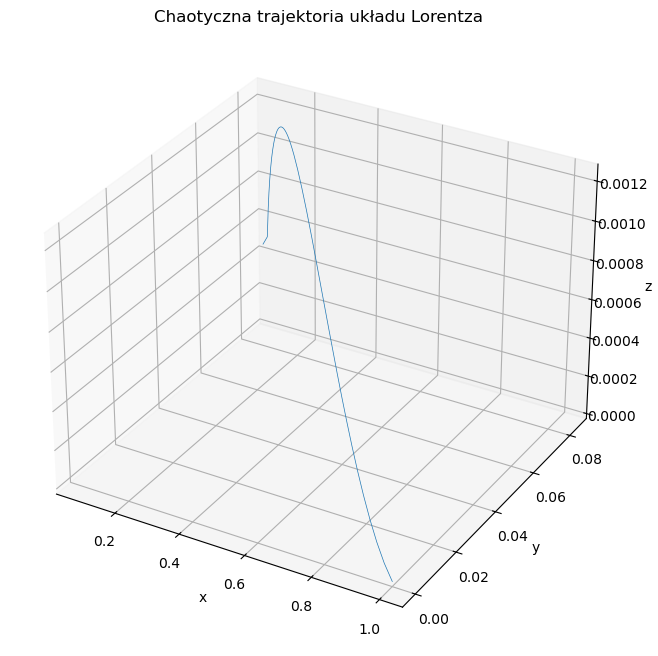

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry układu Lorentza
sigma = 11
rho = 1
beta = 13

# Funkcja definiująca układ równań Lorentza
def lorentz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Metoda Rungego-Kutty 4. rzędu
def runge_kutta(f, t0, y0, h, n):
    t, y = t0, y0
    results = np.zeros((n+1, 4))  # Storing time and state in a consistent way (shape: n+1 x 4)

    # First step
    results[0] = np.append([t], y)  # Append time and state as a 1D array
    
    for i in range(1, n+1):
        k1 = np.array(f(t, y))
        k2 = np.array(f(t + h/2, y + h/2 * k1))
        k3 = np.array(f(t + h/2, y + h/2 * k2))
        k4 = np.array(f(t + h, y + h * k3))
        
        y = y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        t = t + h
        
        results[i] = np.append([t], y)  # Append time and state as a 1D array

    return results

# Parametry numeryczne
initial_conditions = [1.0, 0.0, 0.0]  # Początkowe warunki (x0, y0, z0)
t_start = 0.0  # Początkowy czas
t_end = 50.0  # Końcowy czas
t_steps = 10000  # Liczba kroków czasowych
h = (t_end - t_start) / t_steps  # Krok czasowy

# Generowanie punktów czasowych
t = np.linspace(t_start, t_end, t_steps)

# Rozwiązywanie układu równań Lorentza
solution = runge_kutta(lorentz, t_start, np.array(initial_conditions), h, t_steps)

# Wyodrębnienie wyników
x, y, z = solution[:, 1], solution[:, 2], solution[:, 3]

# Wizualizacja wyników

# Wykres trajektorii w przestrzeni 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Chaotyczna trajektoria układu Lorentza')

plt.show()
